- Course: DSC680
- Name: Carla Harrell
- Assignment: Project 1
- Date: 06/28/20

## Can Other Laboratory Test Provide Hints of Covid19 Positive Results?


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the dataset

In [2]:
df = pd.read_excel("dataset.xlsx")
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [3]:
df.shape

(5644, 111)

# Project overview

- This data is of 5644 patients and 109 different diagnostic attributes. We also have a target variable which states whether that patient is Covid +ve or -ve.

 - The idea is to predict whether the patient is covid +ve or -ve using the 109 variables through the application of Data Science.
 
 - The following is the process we would like to apply through the course of this project:
 
     A. Basic EDA: A basic EDA would be run over the dataset to get a glimpse of what is there in the dataset at a high level
 
     1. Dropping junk variables: The variables which are 99% are removed as only 1% data availability wont add much to the training of the model 
     2. Correlation matrix: This will help us understand the correlation among the variables. This gives us an idea of variables which are highly correlated and whether there exists multi-collinearity among the variables etc. 
     3. Handle missing values in the remaining varaibles: Some of the variables in the dataset are having missing values in them. Since, we cannot directly replace them with 0, for e.g. a missing Heamoglobin doesn't necessarily mean 0 Heamoglobin, but this missing could hold some information that the doctor didnt advice the patient for doing the Heamoglobin check for some reason. We do not want to miss this information and hence replace it with 999 so that these are understood as missing. We are going to apply decision tree. So a missing value which would be 999 would be treated as a different bucket. This way if some information is available even in the missing, we wont lose it
     4. Train and Validation split: We would like to split the data into training and validation with 70:30 ratio. This will help us to see overfitting or underfitting issue 
     5. Fit Decision Tree Model: We will then apply decision tree on training dataset and apply it on validation and check the accuracies in training and validation
     6. Feature Importances: We will then try to draw a plot to understand which are the top variables that has high predictive power in predicting whether the patient is covid +ve or not
     7. Bivariate analysis of Top features
    

## A. Basic EDA

In [4]:
df.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  ...  Hb saturation (arterial blood gases)  \
count  6.020000e+02  ...                          2.700000e+01   
mean  -7.866736e-09  ...                         -1.379737e-10   
std    1.000832e+00  ...                          1.019049e+00   
min   -1.865070e+00  ...                         -1.999560e+00   
25%   -7.307069e-01  ...                         -1.122574e+00   
50%   -1.426696e-02  ...                          2.677689e-01   
75%    5.976919e-01  ...                          7.383496e-01   
max    3.764100e+00  ...                          1.337265e+00   

       pCO2 (arterial blood gas analysis)  \
count                        2.700000e+01   
mean                         8.416397e-09   
std                          1.019049e+00   
min                         -1.244817e+00   
25%                         -5.348102e-01   
50%                         -2.120799e-01   
75%                          2.305214e-02   
max                          3.236524e+00   

       Base excess (arterial blood gas analysis)  \
count                               2.700000e+01   
mean                               -1.655685e-09   
std                                 1.019049e+00   
min                                -3.082674e+00   
25%                                -3.308668e-01   
50%     

In [5]:
pd.set_option("display.max_rows", 200, "display.max_columns", 200)

In [6]:
print(df.max())

Patient ID                                               fff6cd69cbbfe83
Patient age quantile                                                  19
SARS-Cov-2 exam result                                          positive
Patient addmited to regular ward (1=yes, 0=no)                         1
Patient addmited to semi-intensive unit (1=yes, 0=no)                  1
Patient addmited to intensive care unit (1=yes, 0=no)                  1
Hematocrit                                                        2.6627
Hemoglobin                                                       2.67187
Platelets                                                        9.53203
Mean platelet volume                                             3.71305
Red blood Cells                                                  3.64571
Lymphocytes                                                       3.7641
Mean corpuscular hemoglobin concentration (MCHC)                 3.33107
Leukocytes                                         

 - From the above 'max' execution over all the columns in the dataset, we find that the maximum numerical value in the dataset is less than 20 and doesn't overflow -20 on the lower side.

In [7]:
pd.options.display.max_info_columns = 111
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 111 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 6   Hematocrit                                             603 non-null    float64
 7   Hemoglobin                                             603 non-null    float64
 8   Platelets                                      

 -  The above info shows which variables are object and which are int/float. We also see the number of nonmissing and get an idea of missing/non-missing in the data for all the variables in the dataset

In [8]:
df['SARS-Cov-2 exam result'].replace({'negative': 0,'positive': 1},inplace=True)

- In the above cell, We code negative as 0 and positive as 1

In [9]:
df['SARS-Cov-2 exam result'].mean()

0.09886605244507442

- Here, the mean represents the percentage of positives as it is coded 1. So, we can see that there are approx. 10% of covid +ve patients in the dataframe

## 1. Dropping junk variables

In [10]:
df = df.loc[:, df.isna().sum()/len(df) < 0.99]

- The above code drops the variables which has greater than 99% of missing values
- The above dataframe tells us that it is free from columns which has more than 95 percentage of missing or Nan values

## 2. Correlation matrix

In [11]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);

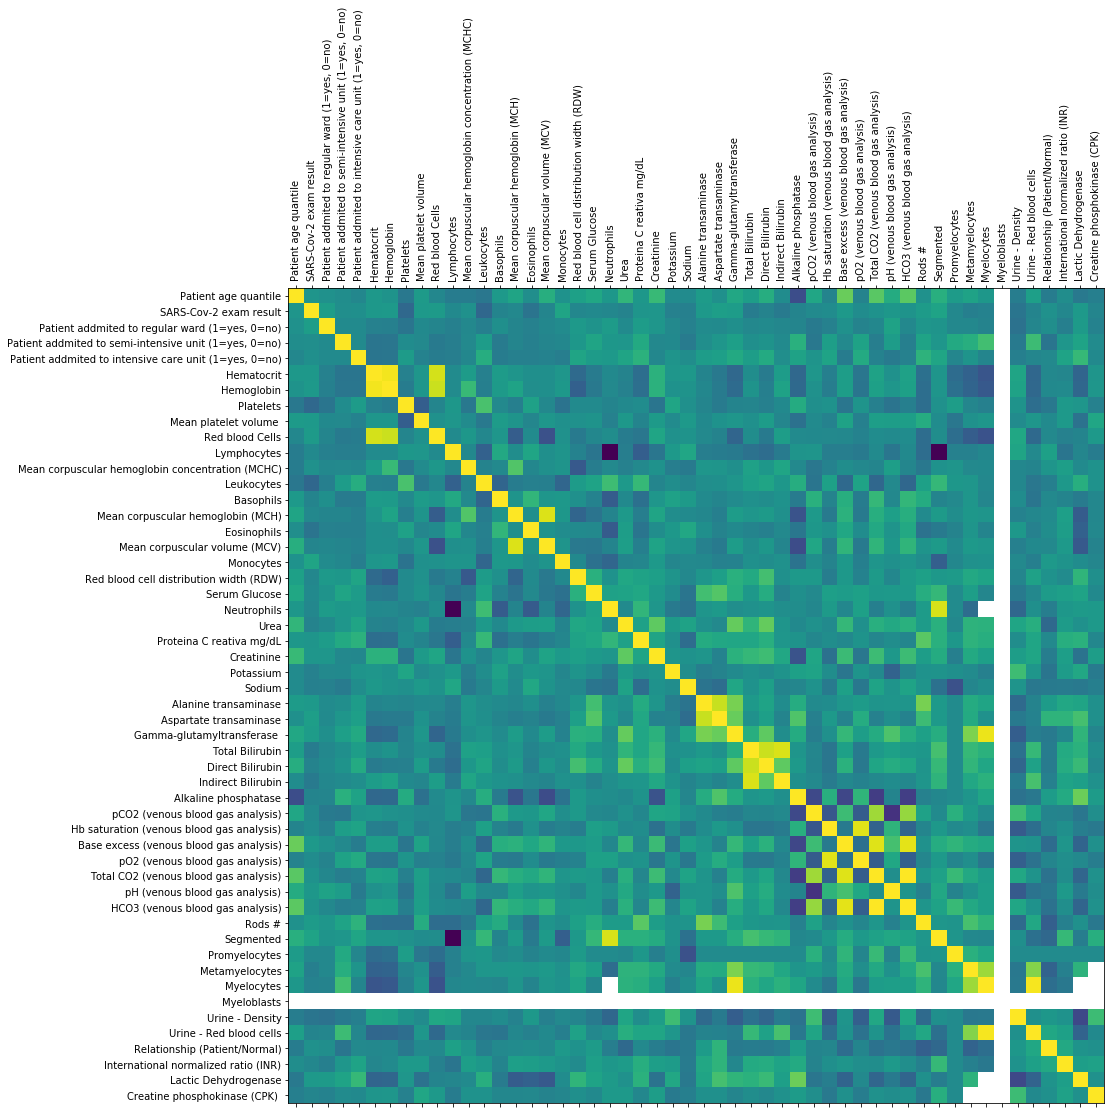

In [12]:
# corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')

plot_corr(df,15)

 - The above correlation matrix doesn't provide us with a great amount information because of the inclusion of so many variables. 

## 3. Handle missing values in the remaining variables:

In [13]:
l_col = list(df.columns)
for i in l_col:
    df[i].replace({np.nan:999},inplace = True)

In [14]:
df.isna().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hematocrit                                               0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                             

- From the above code, we can see that there are no missing values in the variables

## 4. Train and Validation split: 

 - Before we try to split the data into training and validation we will try to check the dtype of the variables in the dataset

In [15]:
X = df.drop(['SARS-Cov-2 exam result','Patient ID'],axis=1)

obj_vars = []
for col in X.columns:
    if X[col].dtype==object:
        obj_vars.append(col)
        
print(" The following variables are object variables and need to be converted into numeric before splitting and fitting the model")
print(obj_vars)

 The following variables are object variables and need to be converted into numeric before splitting and fitting the model
['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A', 'Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']


 -  We will try to include only those variables whose number of categories are less than 10 just to remove junk variables

In [16]:
print("The dropped variables are : ")
for col in obj_vars:
    if X[col].nunique()>10:
        print(col,X[col].nunique())
        X.drop([col],axis=1,inplace=True)

The dropped variables are : 
Urine - pH 16
Urine - Leukocytes 32


 - The categorical object dtype variables will be converted into dummies and then a decision tree would be fit over it


In [17]:
X = pd.get_dummies(X,drop_first=True)

In [18]:

y = df['SARS-Cov-2 exam result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [19]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Plotting Decision tree 

In [20]:
import os
from sklearn import tree
# Creating a Tree graph
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile, feature_names = X.columns, filled=True)
dotfile.close()


In [21]:
#Saving tree as png
!dot -Tpng dtree.dot -o tree.png


(dot.exe:15460): Pango-WARNING **: Invalid UTF-8 string passed to pango_layout_set_text()

(dot.exe:15460): Pango-WARNING **: Invalid UTF-8 string passed to pango_layout_set_text()

(dot.exe:15460): Pango-WARNING **: Invalid UTF-8 string passed to pango_layout_set_text()


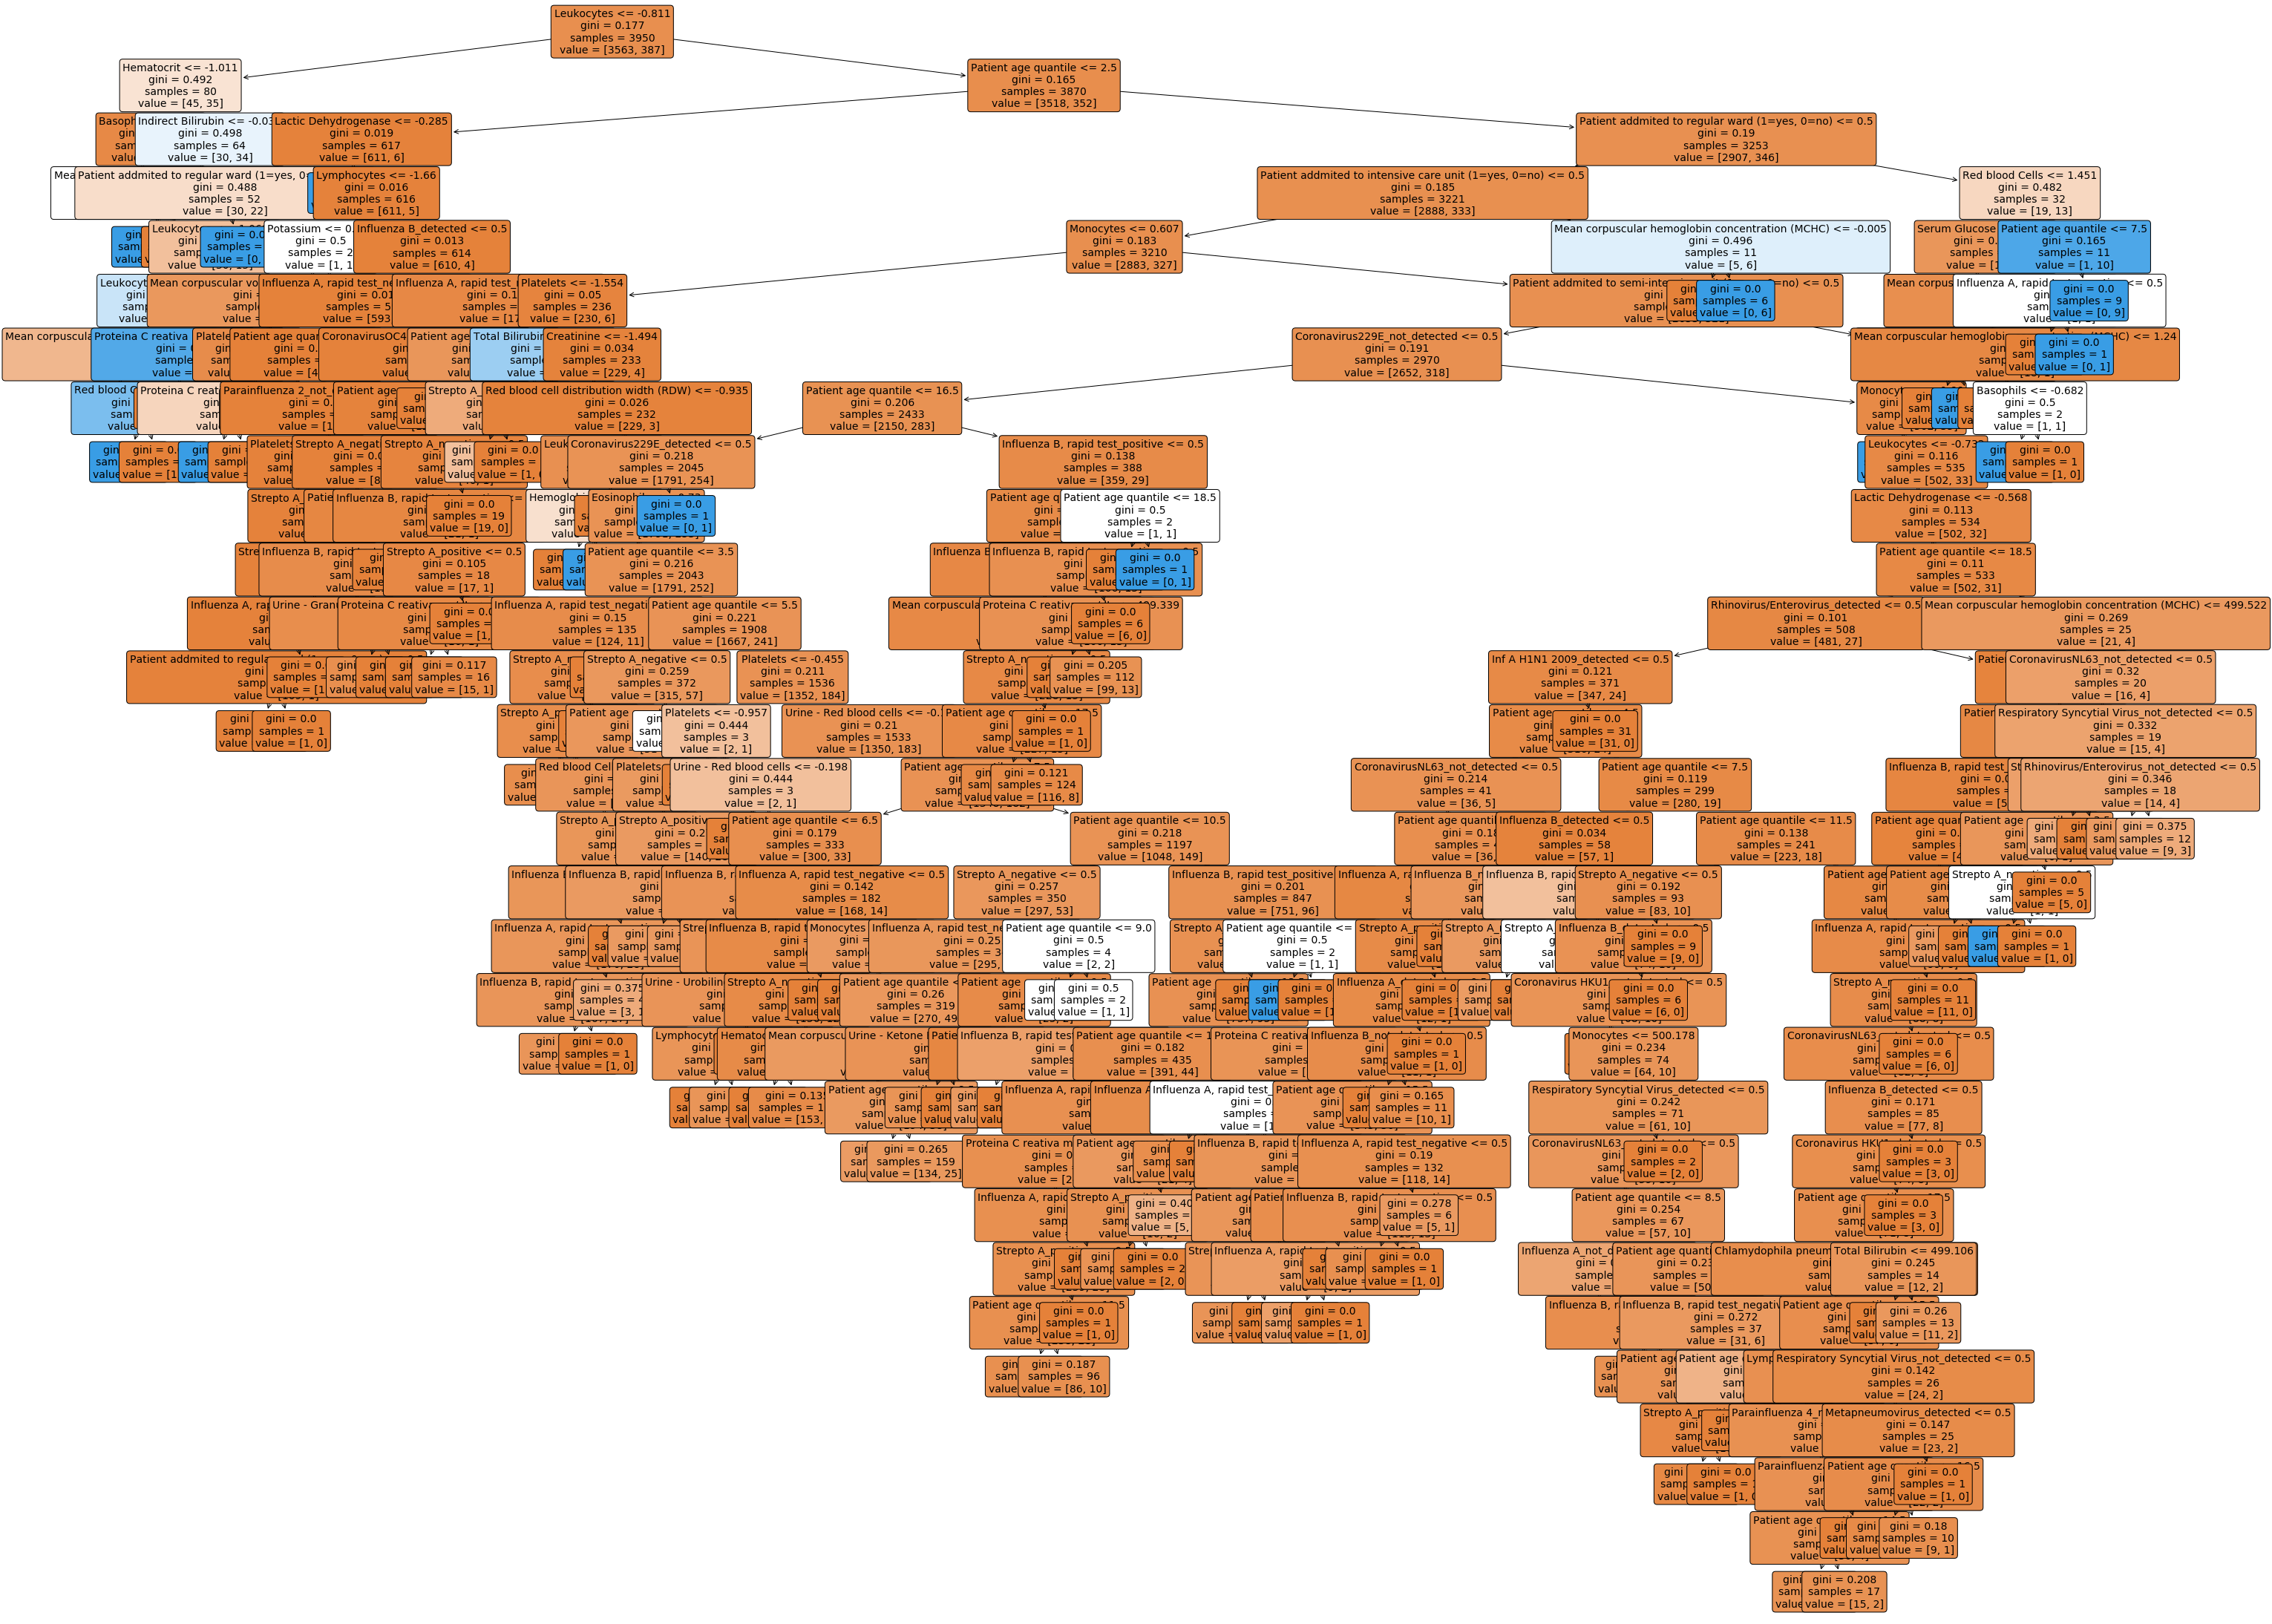

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,40))
a = plot_tree(classifier, 
              feature_names=X.columns, 
               
              filled=True, 
              rounded=True, 
              fontsize=14)

 - Since the above decision tree looks more clumsy, we will try to rebuild a model with only top variables 

## 5. Feature Importances

In [23]:
import matplotlib.pyplot as plt

importances = classifier.feature_importances_
indices = np.argsort(importances)[-20:]



Text(0.5, 0, 'Relative Importance')

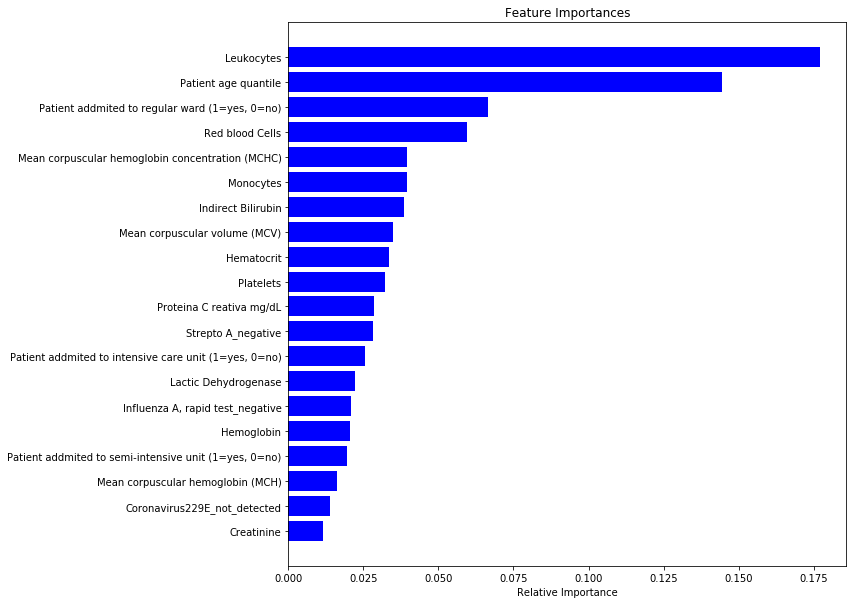

In [24]:

features = np.array(X.columns)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## We refit the model with only top features

In [25]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train[features[indices]], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Plotting decision tree with only top features


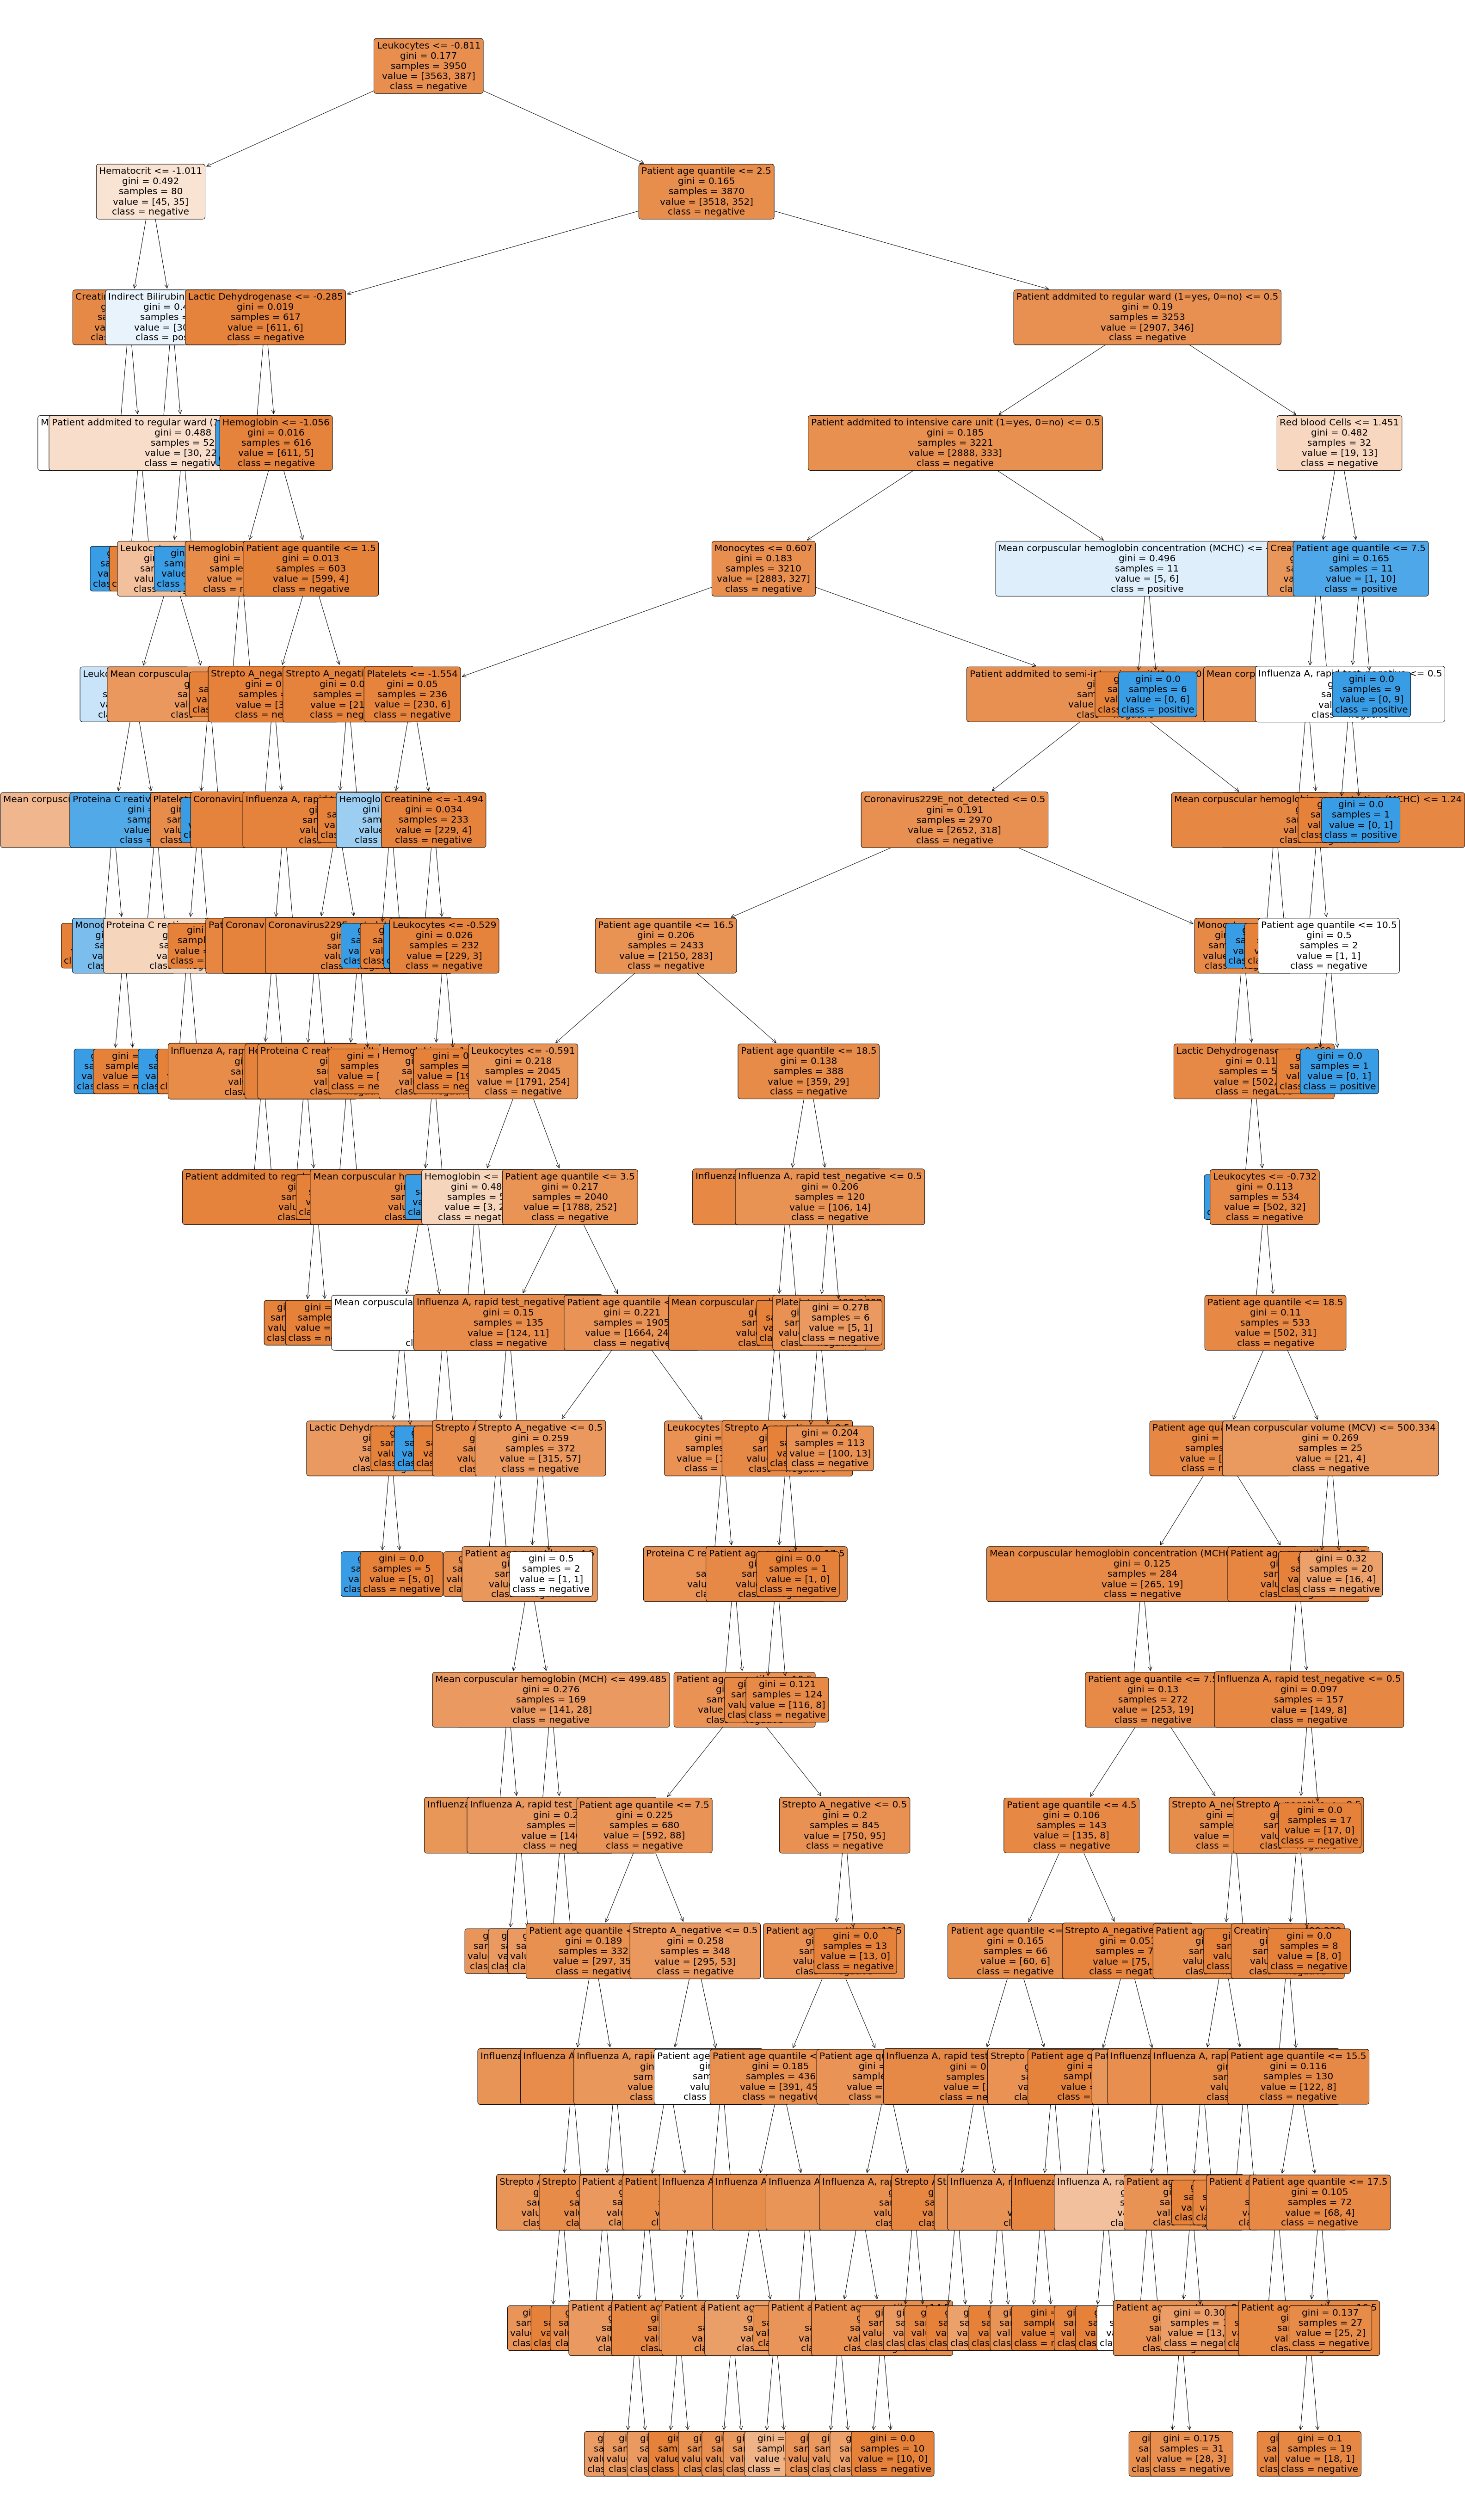

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,100))
a = plot_tree(classifier, 
              feature_names=features[indices], 
              class_names=['negative','positive'], 
              filled=True, 
              rounded=True, 
              fontsize=20)

####Refit the tree using Graphviz

In [27]:
import os
from sklearn import tree
# Creating a Tree graph
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile, feature_names = features[indices])
dotfile.close()


In [28]:
#Saving tree as png
!dot -Tpng dtree.dot -o tree.png


(dot.exe:28296): Pango-WARNING **: Invalid UTF-8 string passed to pango_layout_set_text()

(dot.exe:28296): Pango-WARNING **: Invalid UTF-8 string passed to pango_layout_set_text()

(dot.exe:28296): Pango-WARNING **: Invalid UTF-8 string passed to pango_layout_set_text()


## Confusion matrices of training and validation

In [29]:
y_pred_valid = classifier.predict(X_test[features[indices]])

In [30]:
confusion_matrix(y_test,y_pred_valid)

array([[1508,   15],
       [ 160,   11]], dtype=int64)

In [31]:
y_pred_training = classifier.predict(X_train[features[indices]])

In [32]:
confusion_matrix(y_train,y_pred_training)

array([[3563,    0],
       [ 315,   72]], dtype=int64)

 - Training dataset: Out of 387 positives in validation, we predicted 313 of them as negative for a 0.5 cut off in probability which is not recommended. However, by lowering the cutoff of probability to divide between 0 and 1 would help in getting better predictions. 


- Validation dataset: Out of 171 positives in validation, we predicted 158 of them as negative which is not recommended. However, by lowering the cutoff of probability to divide between 0 and 1 would make things better. 
 
 

## 6. Bivariate Analysis of top features

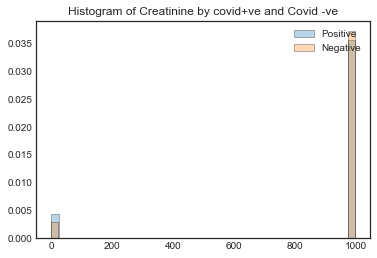

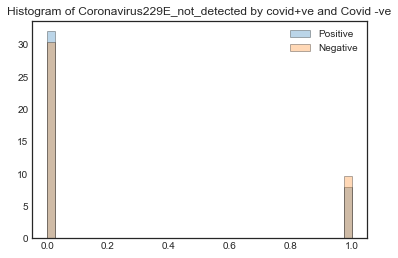

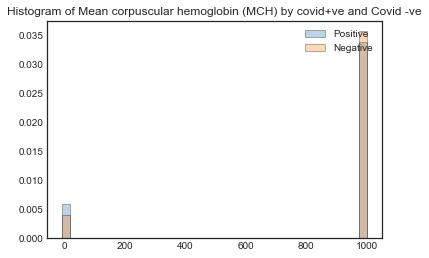

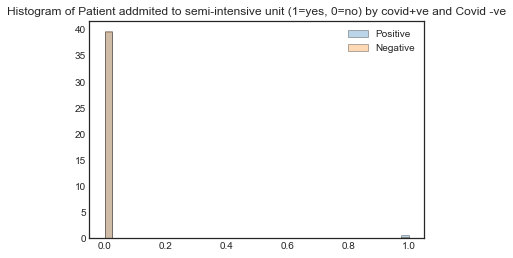

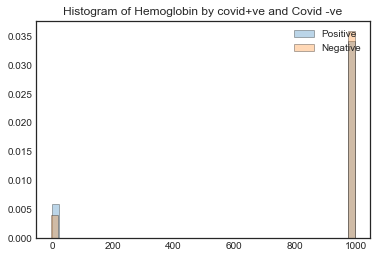

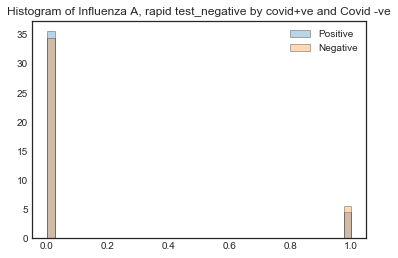

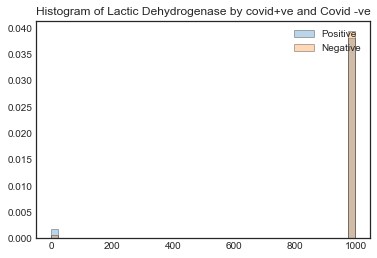

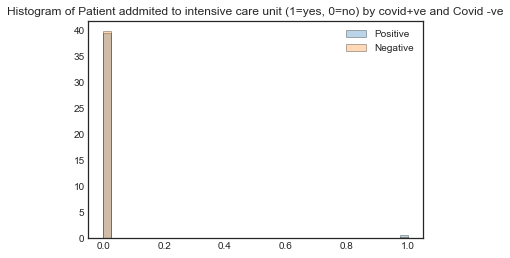

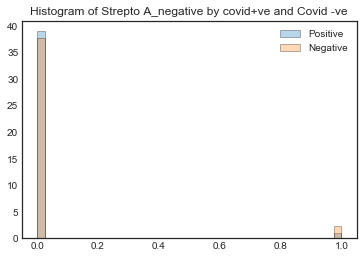

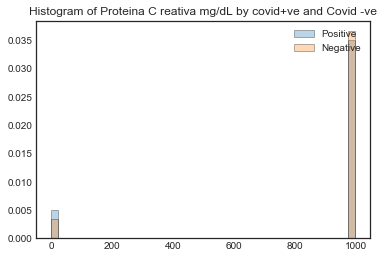

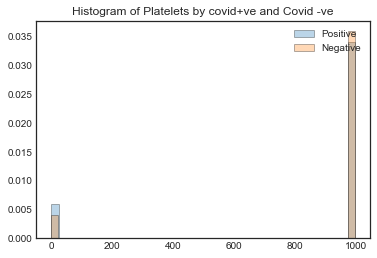

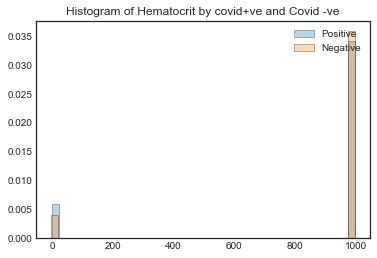

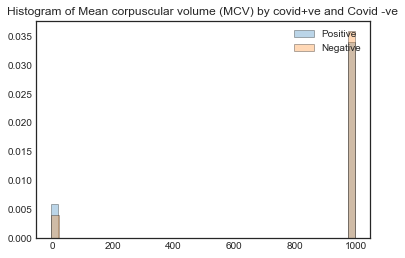

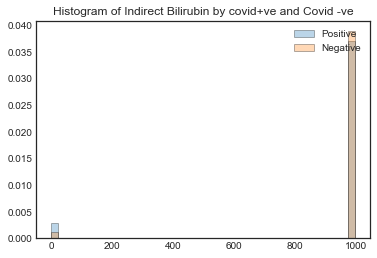

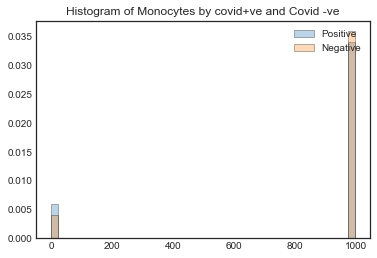

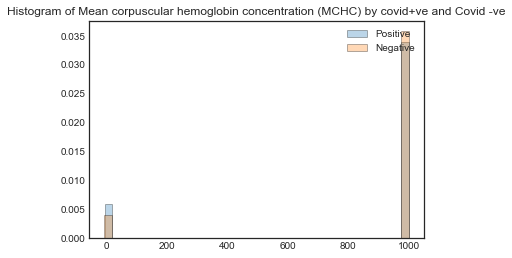

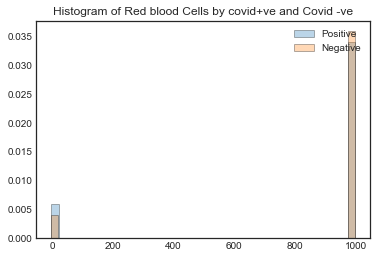

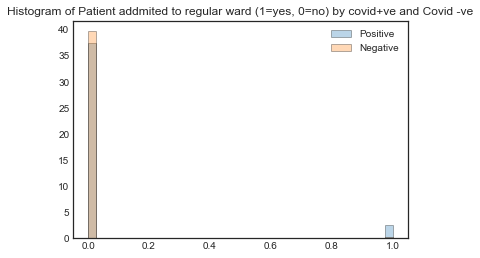

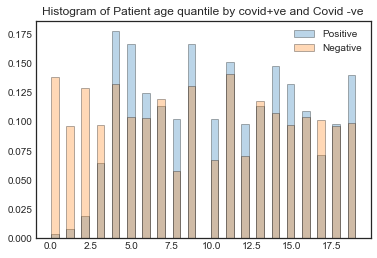

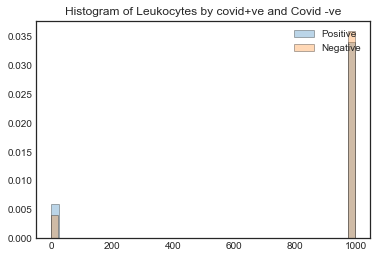

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


for col in features[indices]:
    x1 = X[y==1][col]
    x2 = X[y==0][col]

    kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, ec="k")
    plt.title(f"Histogram of {col} by covid+ve and Covid -ve")
    plt.hist(x1,**kwargs)
    plt.hist(x2,**kwargs)
    
    plt.legend(['Positive','Negative'])

    plt.show()